<a href="https://colab.research.google.com/github/R09722akaBennett/Side_Project/blob/master/91app_CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Module and Data

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
!pip install monpa
import monpa
from monpa import utils
import calendar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
+---------------------------------------------------------------------+
  Welcome to MONPA: Multi-Objective NER POS Annotator for Chinese
+---------------------------------------------------------------------+
已找到 model檔。Found model file.


In [3]:
data_path = '/content/gdrive/Shareddrives/Big Data and Business Analytic/final_project/Raw_data/91APP_OrderSlaveData.csv'
OrderSlave_df = pd.read_csv(data_path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8,9,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Get specific time period data

In [4]:
# pd.to_datetime(OrderSlave_df['OrderFinishDateTime']).min()
# pd.to_datetime(OrderSlave_df['OrderFinishDateTime']).max()

In [5]:
# Convert 'OrderFinishDateTime' From object to datetime
OrderSlave_df['OrderFinishDateTime'] = pd.to_datetime(OrderSlave_df['OrderFinishDateTime'])
OrderSlave_df.sort_values(['OrderFinishDateTime'])

,UnifiedUserId,MemberId,TradesGroupCode,TradesSlaveCode,OrderDateTime,OrderFinishDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,...,ProductSkuCode,SalePageId,Qty,UnitPrice,SubtotalSalesAmount,SubtotalPrice,SubtotalPromotionDiscount,SubtotalCouponDiscount,SubtotalLoyaltyPointDiscount,StatusDef
1371673,gTBzWHNEhgZnGGKIFCj9aQ==,GVEsjYQcZdsHw6iLAQu0V7Zl79FSeV5JV0T1joz2BC4=,1iebUt19r1NTfATSpy4cgXW0iv4NPmWXe+eFpZlLEok=,xMOffT1wKArpyGE4D5cHdTkoX57ChBhWsXwSBeCPFpQ=,2013-09-30 14:14:26.587,2013-09-30 14:24:01.703,Mall,DesktopOfficialWeb,CreditCardOnce,Home,...,P4eIvuOb2Axy2ChW3QHkRQ==,hvLaUqrmI3Fy06466UTyGQ==,1,29.0,29.0,29,0,0.0,0,Cancel
1337140,gTBzWHNEhgZnGGKIFCj9aQ==,GVEsjYQcZdsHw6iLAQu0V7Zl79FSeV5JV0T1joz2BC4=,1iebUt19r1NTfATSpy4cgXW0iv4NPmWXe+eFpZlLEok=,xMOffT1wKArpyGE4D5cHdd9dO+HJoB5di+0L40agcQs=,2013-09-30 14:14:26.587,2013-09-30 14:24:02.733,Mall,DesktopOfficialWeb,CreditCardOnce,Home,...,0gnN55wkJKJnlc7cRRDa6Q==,GGUeu+F3s0n9uCqbAiBBXA==,1,499.0,499.0,499,0,0.0,0,Cancel
1208877,gTBzWHNEhgZnGGKIFCj9aQ==,GVEsjYQcZdsHw6iLAQu0V7Zl79FSeV5JV0T1joz2BC4=,1iebUt19r1NTfATSpy4cgXW0iv4NPmWXe+eFpZlLEok=,xMOffT1wKArpyGE4D5cHdXt0y6LvUKkBl1K8kskeSVA=,2013-09-30 14:14:26.587,2013-09-30 14:24:03.807,Mall,DesktopOfficialWeb,CreditCardOnce,Home,...,coIBs1xBV2Jy/91Mti3bzA==,uWhXUEY+Rc1Rp4qRIBfDmQ==,1,999.0,999.0,999,0,0.0,0,Cancel
1252700,QEvAUrRHw4mlifqLtDmSkg==,qlYoM/nk5SSBMrw+h+UgR9w2mM99eHqbrfCFGRdpwaQ=,WVKJ8zN9DWH6s2Ft5amP5ywNjyXMSJWMXY5QEEBBUEY=,CeyPclcFe0JRUvzOGwZkp5x+AL94S4GTX61cHPl0fWc=,2013-09-30 20:30:18.603,2013-09-30 20:36:01.413,OfficialECom,iOSApp,CreditCardOnce,Home,...,a8QcQ0iZO62M1eLjyrMWCw==,GGUeu+F3s0n9uCqbAiBBXA==,1,499.0,499.0,499,0,0.0,0,Cancel
1381322,wgF7IRA+OcG+ymdBpZf4zA==,w3oq+QsQezoJL7d85U0v2Zj+/BFPIpN12bmMJ1I9FOI=,7iGmmLxnrg2FMB0D7mUcMSgNkuoIMKvO/+xaE5jNkpc=,7jgqXEjLdXufTz1oSBLz6iB7GeUfLj86oqILHfdP8Pw=,2013-09-30 21:44:47.100,2013-09-30 21:44:47.320,OfficialECom,iOSApp,CreditCardOnce,Home,...,/cYeEfX9jrRg8BRXqixfIw==,KO+T/LaariWpGf9xrrsmdQ==,1,999.0,999.0,999,0,0.0,0,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846432,Fh5wkyMpIFXv6DurBCubBA==,RIp1XbcAyqq39mSCz+MdAKNBC1KHhDBIEwc1PXIux6I=,pbQLWHwW2sABFxnFMn1w9op5FRKLA9kj/tiPL5Q/bX8=,lUzs4dOAeH57UhxFOyLf01gsql7ZQ9RWXm8RnDf045U=,2022-04-19 22:40:46.467,2022-05-04 21:30:28.527,OfficialECom,MobileWeb,Family,Family,...,tkhsSY7RIqvCFgJhtnJq4A==,DpKDUHKWs5PcQUFQpjlRrw==,1,0.0,0.0,0,0,0.0,0,Overdue
1442741,lZf//5wrFox91vQTOMqQ7Q==,0GokKRDnuqUAZDcRQFOjdV6RFpBE0eJQ4fb8ri6yGds=,SpCfl+eBS11rjZsl/KJ+NcFzdRgH7UWVsXM987F5n4E=,ppjHCwVT88RHLB7PY63BJnNOMP+QBmiMs6hb5fZIXek=,2022-03-31 21:04:52.113,2022-05-04 21:41:08.293,OfficialECom,iOSApp,CreditCardInstallment,FamilyPickup,...,pibHEVJr2IfIRj6InIcdIg==,qUtU/e9J5P7O9Cl6Bva0vg==,1,1980.0,1620.0,1980,-198,-162.0,0,Finish
1438177,lZf//5wrFox91vQTOMqQ7Q==,0GokKRDnuqUAZDcRQFOjdV6RFpBE0eJQ4fb8ri6yGds=,SpCfl+eBS11rjZsl/KJ+NcFzdRgH7UWVsXM987F5n4E=,ppjHCwVT88RHLB7PY63BJpQcEwxZ9pjQ5H+XiYr7BX4=,2022-03-31 21:04:52.113,2022-05-04 21:41:12.537,OfficialECom,iOSApp,CreditCardInstallment,FamilyPickup,...,tNFWRBB2wIqh9KW+t3uqxg==,CrSTcRGe482VVhEOrDtoBA==,1,349.0,349.0,349,0,0.0,0,Finish
1476823,lZf//5wrFox91vQTOMqQ7Q==,0GokKRDnuqUAZDcRQFOjdV6RFpBE0eJQ4fb8ri6yGds=,SpCfl+eBS11rjZsl/KJ+NcFzdRgH7UWVsXM987F5n4E=,ppjHCwVT88RHLB7PY63BJnCtvKWJSMH5rvgZ6Q+nK+c=,2022-03-31 21:04:52.113,2022-05-04 21:41:12.537,OfficialECom,iOSApp,CreditCardInstallment,FamilyPickup,...,9vcToLPn2a/6R4Qr3F4zUw==,IzU12jMefxR3L9hgPTsI+Q==,1,0.0,0.0,0,0,0.0,0,Finish


In [6]:
# Function to get specific time period data
def time_period(start:str, end:str, df):
  '''
  start end format：%Y-%m-%d %H:%M:%S
  According'OrderFinishDateTime' column
  '''
  s_date = datetime.strptime(start, '%Y-%m-%d %H:%M:%S').date()
  e_date = datetime.strptime(end, '%Y-%m-%d %H:%M:%S').date()
  return df[(df.OrderFinishDateTime > pd.Timestamp(s_date)) & (df.OrderFinishDateTime < pd.Timestamp(e_date))]

In [7]:
# Filter data to get Finish and Return transaction
proceeded_data = OrderSlave_df[OrderSlave_df['StatusDef'].str.contains('Finish') | OrderSlave_df['StatusDef'].str.contains('Return')]

In [8]:
# Get Year 2021 transaction
proceeded_data_2022 = time_period('2021-05-04 00:00:00', '2022-05-04 00:00:00', proceeded_data) #2022 transaction
proceeded_data_2021 = time_period('2020-05-04 00:00:00', '2021-05-04 00:00:00', proceeded_data) #2021 transaction
proceeded_data_2020 = time_period('2019-05-04 00:00:00', '2020-05-04 00:00:00', proceeded_data) #2020 transaction

# Recency, Frequency, Monetary

In [9]:
# Get all members latest order date
recency = pd.DataFrame(proceeded_data_2021.groupby('MemberId')['OrderFinishDateTime'].max())
# Set Recency startpoint on 2021-05-04(the latest day in 2021 data) and calculate how much time has elapsed since a member’s last activity or transaction
recency['R'] = pd.Timestamp("2021-05-04 00:00:00") - recency['OrderFinishDateTime']

In [10]:
# Count how many transaction a member have made in the year
frequency_Trades = pd.DataFrame(proceeded_data_2021.groupby(['MemberId',"TradesSlaveCode"]).count())
frequency = pd.DataFrame(frequency_Trades.groupby('MemberId').count().TradesGroupCode)

In [11]:
# Sum 'SubtotalSalesAmount' to get amount spent for each members
monetary = pd.DataFrame(proceeded_data_2021.groupby('MemberId')['SubtotalSalesAmount'].sum())

# RFM table


In [12]:
# Merge Recency, Frequency and Monetary table in to RFM table
RFM_data = pd.merge(recency, frequency, how='inner', left_on='MemberId', right_on='MemberId')
RFM_data = pd.merge(RFM_data, monetary, how='inner', left_on='MemberId', right_on='MemberId')
RFM_data = RFM_data[['R', 'TradesGroupCode', 'SubtotalSalesAmount']]
RFM_data.columns = ['Recency', 'Frequency', 'Monetary']
RFM_data['Recency'] = RFM_data['Recency'].dt.days

# Trasform RFM into score 1-5 according of their quantile

In [13]:
# Observating Frequency and Montary quantile to set the benchmark
print(RFM_data.Frequency.quantile([0.59,0.83,0.94,0.98]))
print(RFM_data.Monetary.quantile([0.2, 0.4, 0.6, 0.8, 1.0]))

0.59     3.0
0.83     5.0
0.94     9.0
0.98    16.0
Name: Frequency, dtype: float64
0.2      1380.0
0.4      1780.0
0.6      2580.0
0.8      3959.0
1.0    184025.0
Name: Monetary, dtype: float64


In [14]:
# f1 function to convert Recency into score 
# Below 73 days = 5 
# Below 146 days = 4
# Below 219 days = 3
# Below 292 days = 2
# Longer than that = 1
def f1(row):
    if row <= 73:
        val = 5
    elif row <= 73*2:
        val = 4
    elif row <= 73*3:
        val = 3
    elif row <= 73*4:
        val = 2
    else:
        val = 1
    return val
RFM_data['Recency_Flag'] = RFM_data['Recency'].apply(f1)

In [15]:
# f2 function to convert Frequency into score 
# 1 times = 1
# 2 times and below = 2
# 4 times and below = 3
# 7 times and below = 4
# more than 7 times = 5
def f2(row):
    if row <= 1:
        val = 1
    elif row <= 2:
        val = 2
    elif row <= 4:
        val = 3
    elif row <= 7:
        val = 4
    else:
        val = 5
    return val
    
RFM_data['Freq_Flag'] = RFM_data['Frequency'].apply(f2)

In [16]:
# f3 function to convert Monetary into score 
# below $1380 = 1
# below $1780 = 2
# below $2580 = 3
# below $3959 = 4
# more than $3959 = 5
def f3(row):
    if row <= 1380:
        val = 1
    elif row <= 1780:
        val = 2
    elif row <= 2580:
        val = 3
    elif row <= 3959:
        val = 4
    else:
        val = 5
    return val
    
RFM_data['Monetary_Flag'] = RFM_data['Monetary'].apply(f3)

# EDA

In [17]:
# Using sweetviz to explode data analyse
%pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import sweetviz as sv
report = sv.analyze(RFM_data)
report.show_html(filepath='/content/gdrive/Shareddrives/Big Data and Business Analytic/final_project/EDA.html')

                                             |          | [  0%]   00:00 -> (? left)

Report /content/gdrive/Shareddrives/Big Data and Business Analytic/final_project/EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


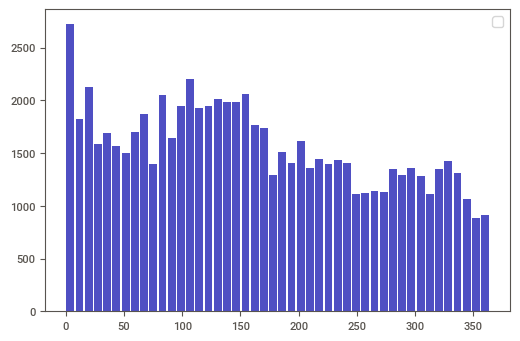

In [19]:
plt.hist(RFM_data.Recency, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.legend()
plt.show()

More than 2500 members purchase within 1 days



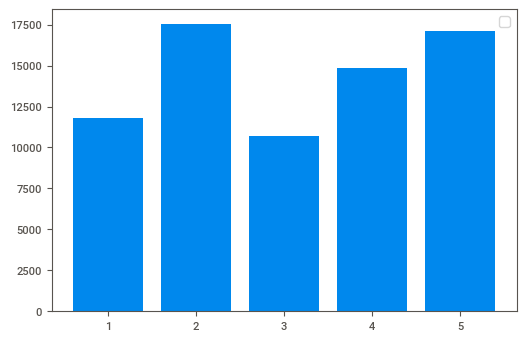

In [20]:
plt.bar(RFM_data.Recency_Flag.unique(), RFM_data.Recency_Flag.value_counts())
plt.legend()
plt.show()

Most of our members score 2 points which purchase within 292 days

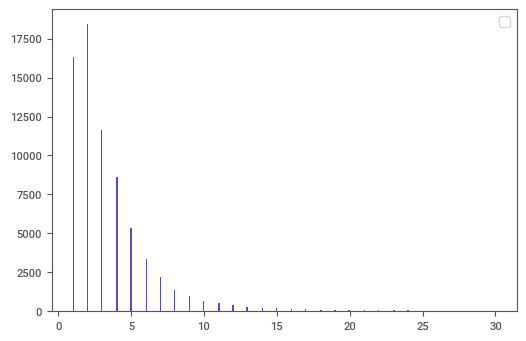

In [21]:
plt.hist(RFM_data.Frequency, range=(1,30), bins='auto', color='#0504aa',alpha=0.7, rwidth=3)
plt.legend()
plt.show()

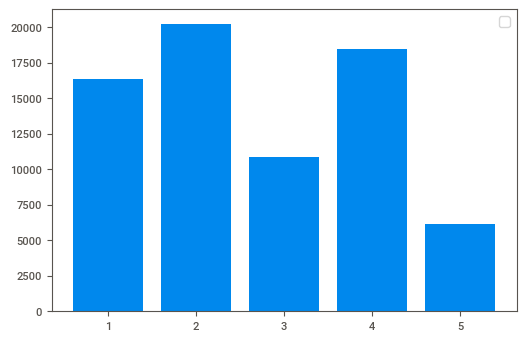

In [22]:
plt.bar(RFM_data.Freq_Flag.unique(), RFM_data.Freq_Flag.value_counts())
plt.legend()
plt.show()

Most of our members score 2 points on frequency which are purchase two times in 2021

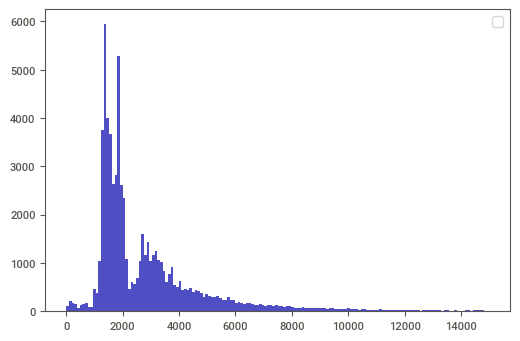

In [23]:
plt.hist(RFM_data.Monetary, range=(1,15000), bins='auto', color='#0504aa',alpha=0.7, rwidth=3)
plt.legend()
plt.show()

Most of the price our member spend are below $2,000

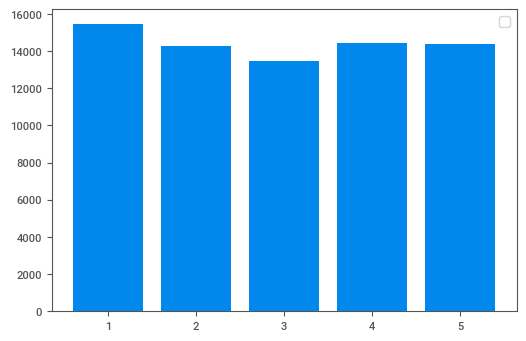

In [24]:
plt.bar(RFM_data.Monetary_Flag.unique(), RFM_data.Monetary_Flag.value_counts())
plt.legend()
plt.show()

# K-means

**繪製損失函數**
ref: https://chih-sheng-huang821.medium.com/%E6%A9%9F%E5%99%A8-%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92-%E5%9F%BA%E7%A4%8E%E4%BB%8B%E7%B4%B9-%E6%90%8D%E5%A4%B1%E5%87%BD%E6%95%B8-loss-function-2dcac5ebb6cb


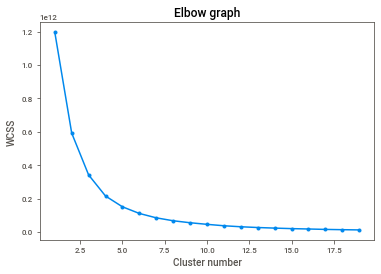

In [25]:
# Loss Function
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(RFM_data)
    wcss.append(kmeans.inertia_)

%matplotlib inline
import matplotlib.pyplot as plt 

plt.plot(range(1,20), wcss, marker='o')
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

In [26]:
# Filter Column to train model
RFM_data_train = RFM_data.filter(['Recency_Flag', 'Freq_Flag', 'Monetary_Flag'])
RFM_data_train

,Recency_Flag,Freq_Flag,Monetary_Flag
MemberId,,,
++/PaLQ2WfBYg+I9LFaid479crfYCwavoyPpb66WVE8=,2,2,1
++0JUOU3bYNKDLaqCwsQflFlzKRgE4k5xjVhOaKP0aM=,5,4,4
++6rOXDBdSgRq7Ks8WEtjF/acB6jaVRXpqWA4HRNGWw=,4,4,5
++9MuUTGd+hU2XuIib742oqLu6GSCM5/1XVsoC2JotQ=,1,1,1
++By9HwKAd+YmL+Guf4PKROTmk/3unCShMojx1qJSwE=,3,3,2
...,...,...,...
zzpr4DLdeOxM9QJ9+C56UADVWTZ0IFwoZUwSrQngg1o=,2,3,4
zztZ2bMjJrgzdd7MvCSs0oNmkDJnDAjckJBnU/2OVSU=,3,1,2
zzw+k3PFtOtuOIu62cuXNkLNLUFDlgmXZj2XeMTwl2g=,4,4,5


In [27]:
# From Graph we decide to set n_clusters into 6 
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
RFM_data['Cluster'] = kmeans.fit_predict(RFM_data_train)
a = RFM_data.groupby('Cluster').count()  # count the members in each cluster
print(a)

         Recency  Frequency  Monetary  Recency_Flag  Freq_Flag  Monetary_Flag
Cluster                                                                      
0          13851      13851     13851         13851      13851          13851
1          10767      10767     10767         10767      10767          10767
2           7970       7970      7970          7970       7970           7970
3          14149      14149     14149         14149      14149          14149
4          13672      13672     13672         13672      13672          13672
5          11592      11592     11592         11592      11592          11592


In [28]:
# Member in Cluster 1 is the most valuable customer for the brand
cluster_result = round(pd.DataFrame(kmeans.cluster_centers_),2)
cluster_result

,0,1,2
0,2.13,3.22,3.88
1,4.25,4.49,4.90
2,4.73,1.76,1.36
3,3.48,1.67,2.24
4,1.45,1.71,1.53
5,4.53,2.93,3.86


In [29]:
# Member in Cluster 1 is the most valuable customer for the brand
RFM_data[RFM_data.Cluster == 1]

,Recency,Frequency,Monetary,Recency_Flag,Freq_Flag,Monetary_Flag,Cluster
MemberId,,,,,,,
++6rOXDBdSgRq7Ks8WEtjF/acB6jaVRXpqWA4HRNGWw=,139,6,5540.0,4,4,5,1
++DFX18zw1zn9lcq1lG2wp9Bl5FFeMES/O88jK/EYHk=,144,7,5439.0,4,4,5,1
++P3hhogUcwlFXNq/N/+F9UFR+XcIHzrhS82Nu5PqD8=,139,6,5216.0,4,4,5,1
++P4RiS8hWd2YNbXLhX2W4gw8Lcej7VkkkiB5AjrKHs=,136,6,3760.0,4,4,4,1
++tUSo+o7BNrhl5/zLaDPY/2Ofj6LwMorH63BxHY0fA=,135,8,5824.0,4,5,5,1
...,...,...,...,...,...,...,...
zzLuTT8rhVMhfoAQlmN/QPGgADtV8csWbfcgnsFw/bI=,153,6,5789.0,3,4,5,1
zzObGrmC1uvpck+Qnqs9Idw3SgfVZM19El/KXd9GIBk=,80,11,11622.0,4,5,5,1
zzSe6Z7G/601LTG0AZZK9yPm9ET9LwMjSKRbDOa8zyI=,127,18,12517.0,4,5,5,1


# Model Perfomance Metric

## Metric 1 : Ratio in Top Sales

In [30]:
# Total members in ALL and VIP
vip_customers = RFM_data[RFM_data.Cluster == 1]
all_customers_num = len(RFM_data)
all_vip_num = len(RFM_data[RFM_data.Cluster == 1])
top_ratio = all_vip_num / all_customers_num
print('All Customer: ' ,all_customers_num)
print('VIP Customer: ' ,all_vip_num)
print('Ratio : ', round(top_ratio * 100,2),'%')

All Customer:  72001
VIP Customer:  10767
Ratio :  14.95 %


In [31]:
# Find the TOP 15% Members in 2021 sales
top_rank_2021 = monetary.sort_values(by='SubtotalSalesAmount',ascending=False)
top_rank_2021 = top_rank_2021.iloc[:all_vip_num]
top_rank_2021 

,SubtotalSalesAmount
MemberId,
tMGtR0T+8V+OZRi3h80VqIFnu5PLjjaxv+uAsDXLdPc=,184025.0
JK30jVAZ8KYuahCHO3+gx8wmcC0TuPKitaJg//SwTTs=,137503.0
l/r69vydRj8UP7LdhdqfsVemucbsykSXCtBlyyLtSvw=,128789.0
Wh8iu+mT2rtkeE7om3KMS/xkPC+HrPOtBhLIAEtMFD4=,114416.0
3JjHg6RqO7g3PE7ClcpsVwdVCQBtN1JUwR3LSBi26zs=,111937.0
...,...
MYantKHX7lcwoHxkREi2MpVQPEfM3q9melYGQpNIyC8=,4690.0
jtY6xdIGXiirhbHCT3aA7tluQyQFq06V5VgSWEyDqaw=,4690.0
3n48N2XrZmwO9T/87bKJjkzy5T+bQ7WqUNED+pM3vQM=,4690.0


In [32]:
# Compare to VIP_list, count the ratio of vip members in top 15 %
corresponse_sheet = pd.merge(vip_customers,top_rank_2021, how='left',left_index=True, right_index=True)
corresponse_sheet = corresponse_sheet[corresponse_sheet.SubtotalSalesAmount.notna()]
corresponse_sheet  # Result : 8278 VIP members are in TOP 15% 

,Recency,Frequency,Monetary,Recency_Flag,Freq_Flag,Monetary_Flag,Cluster,SubtotalSalesAmount
MemberId,,,,,,,,
++6rOXDBdSgRq7Ks8WEtjF/acB6jaVRXpqWA4HRNGWw=,139,6,5540.0,4,4,5,1,5540.0
++DFX18zw1zn9lcq1lG2wp9Bl5FFeMES/O88jK/EYHk=,144,7,5439.0,4,4,5,1,5439.0
++P3hhogUcwlFXNq/N/+F9UFR+XcIHzrhS82Nu5PqD8=,139,6,5216.0,4,4,5,1,5216.0
++tUSo+o7BNrhl5/zLaDPY/2Ofj6LwMorH63BxHY0fA=,135,8,5824.0,4,5,5,1,5824.0
+/Vntu+b6rUT+HmguVK+Ge6F6C31WtXF42aDdFKXwFU=,4,5,5456.0,5,4,5,1,5456.0
...,...,...,...,...,...,...,...,...
zzLuTT8rhVMhfoAQlmN/QPGgADtV8csWbfcgnsFw/bI=,153,6,5789.0,3,4,5,1,5789.0
zzObGrmC1uvpck+Qnqs9Idw3SgfVZM19El/KXd9GIBk=,80,11,11622.0,4,5,5,1,11622.0
zzSe6Z7G/601LTG0AZZK9yPm9ET9LwMjSKRbDOa8zyI=,127,18,12517.0,4,5,5,1,12517.0


In [33]:
# Find the TOP 15% Members in 2022 sales
monetary_2022 = pd.DataFrame(proceeded_data_2022.groupby('MemberId')['SubtotalSalesAmount'].sum()) # Create monetary table for 2022

top_rank_2022 = monetary_2022.sort_values(by='SubtotalSalesAmount',ascending=False) # Find the TOP 15% Members in 2022 sales
top_rank_2022 = top_rank_2022.iloc[:int(len(top_rank_2022)*top_ratio)]
top_rank_2022

,SubtotalSalesAmount
MemberId,
6McP2ch3K42cXKF0mLz20hnROfDe8NakmgbbJXerbes=,228891.0
Qe/z4r3K67xRT1nKhdbsQihX8Muz8kdCXAFxMB9nq+k=,196560.0
f5qQgBpx8x8tucjJAKxgB/jnpQ1B9LK3fzj/9ESBl/k=,141120.0
l/r69vydRj8UP7LdhdqfsVemucbsykSXCtBlyyLtSvw=,140945.0
F8ClQ24EfIDVC1+Lu66k9EBAQegHKowso6txKuNSUho=,128549.0
...,...
LpNjnJbwXqO5a6idIIHjzUEKsnB+cyN0JIsdx4zu7Lg=,4848.0
/Zp371OXpKSqrNalkX2Wp2Nmo1zx2/haWmaIQUmnWjE=,4848.0
D810/l53h7+TYwLqe33u1fmRpYQGYUMg+hyDZk7Gy+E=,4847.0


In [34]:
# all_sheet = pd.merge(RFM_data,monetary_2022,how='left',left_index=True, right_index=True)
# all_sheet[all_sheet.SubtotalSalesAmount.notna()]

In [35]:
# Compare to 2021 VIP_list, count the ratio of 2021 vip members in Sales 2022

corresponse_sheet_2022 = pd.merge(vip_customers,top_rank_2022, how='left',left_index=True, right_index=True)
corresponse_sheet_2022 = corresponse_sheet_2022[corresponse_sheet_2022.SubtotalSalesAmount.notna()]
corresponse_sheet_2022   # Result : 2355 2021_VIP members are in the TOP 15% sales in 2022

,Recency,Frequency,Monetary,Recency_Flag,Freq_Flag,Monetary_Flag,Cluster,SubtotalSalesAmount
MemberId,,,,,,,,
+5Jlam/knkD1SYO3KeBMmgzpNZOx9xgP2QdiUWY34QQ=,12,12,34369.0,5,5,5,1,11487.0
+8V9fBD1o5c2Y6VYMOsodV8/NBQPWpTI1GmdnKVIoZ0=,124,9,11307.0,4,5,5,1,7122.0
+9VtxCzrlmGLicV2ceqgLkaDjss/JQS6xNAk9hWUHjg=,128,6,7168.0,4,4,5,1,5305.0
+AEHgVqU/yLw0w7F0ejQDlAuVCYRdQosT2QAHhnC/tc=,126,8,6119.0,4,5,5,1,5073.0
+Cfrv2u4v1UwVQUlA2mtFngQip/tGKy4pUOfeyExnyg=,111,11,6192.0,4,5,5,1,6012.0
...,...,...,...,...,...,...,...,...
zpzs/dSKX2+bhlGGNYG5YRa4FbZ7srrQT7oIlhcOCN8=,22,18,13424.0,5,5,5,1,8132.0
zrN5wOru6NGxi0D0IXSXk/x/lS7ufAmgkazK6o03Gf8=,66,18,14200.0,5,5,5,1,7134.0
zuSPc1DVk9u2qjkHaYF8HvQkB3HaK7vyc/1TQ6YDomo=,60,16,11737.0,5,5,5,1,23157.0


In [36]:
# Count the ratio of 2021_VIP customers (Cluster 1) in TOP 15% in sales 2021 and 2022
Ration_in_top_2021 = len(corresponse_sheet) / len(top_rank_2021)
Ration_in_top_2022 = len(corresponse_sheet_2022) / len(top_rank_2022)
print('Ratio of 2021_VIP members in Top 15% sales in 2021 : ',round(Ration_in_top_2021 *100,2),'%')
print('Ratio of 2021_VIP members in Top 15% sales in 2022 : ',round(Ration_in_top_2022*100,2),'%')

Ratio of 2021_VIP members in Top 15% sales in 2021 :  76.88 %
Ratio of 2021_VIP members in Top 15% sales in 2022 :  27.01 %


Result: The ratio of Cluster 1 which are our VIP members are 14.95% of all member. We will overall count as 15%<br>
So, We expected most of the vip members are on the top 15% sales<br>
as the result we can see, about 76.88% of VIP members are included in TOP 15% in 2021<br>
But in 2022 ,Only got 27% of our VIP members are in TOP 15%<br>
So we will use other metric to validate our model

## Metric 2 : Percentage in Sales



In [37]:
# function to count the percentage in Sales
def cluster_percentageofsales():
  all_customers_num = len(RFM_data)
  all_customers_monetary = RFM_data['Monetary'].sum()
  cluster_numlist =[]
  proportion_list =[]
  cluster_monetary=[]
  name_list=[]
  Mratio_list=[]
  for i in range(0,6):
    num = len(RFM_data[RFM_data.Cluster == i])
    Msum = RFM_data[RFM_data.Cluster == i]['Monetary'].sum()
    cluster_numlist.append(num)
    proportion_list.append(round(num / all_customers_num * 100,2))
    cluster_monetary.append(Msum)
    Mratio_list.append(round(Msum/all_customers_monetary *100,2))
    name_list.append(f"cluster{i}")
  result = pd.DataFrame((zip(name_list, proportion_list,Mratio_list)), columns = ['Name', 'Proportion in Member','Salesratio'])
  print(result)

cluster_percentageofsales() # Result : Cluster 1 which our VIP customers are only 15 % of ALL customer but provide more than 40% Sales

       Name  Proportion in Member  Salesratio
0  cluster0                 19.24       19.87
1  cluster1                 14.95       41.52
2  cluster2                 11.07        4.02
3  cluster3                 19.65       10.33
4  cluster4                 18.99        7.85
5  cluster5                 16.10       16.41


We going to use our total sales as one of the metric to see the ratio of VIP member spend in 2021<br>
The result showing 15% of members are our VIP members, but they actually provide more than 40% sales to us.

## Metric 3 : Purchasing power and Retention Rate

In [38]:
# Compare both year perfomance in 2021 and 2022
def between_performace():
  twoyearsheet = pd.merge(RFM_data,monetary_2022, how='left',left_index=True, right_index=True)
  twoyearsheet2 = twoyearsheet[twoyearsheet.SubtotalSalesAmount.notna()]
  cluster_numlist2021 = []
  cluster_avgmontary2021 = []
  cluster_numlist2022 = []
  cluster_avgmontary2022 = []
  Retention_rate = []
  name_list = []
  for i in range(0,6):
    num_2021 = len(twoyearsheet[twoyearsheet.Cluster == i])
    Msum_2021 = twoyearsheet[twoyearsheet.Cluster == i]['Monetary'].sum()
    num_2022 = len(twoyearsheet2[twoyearsheet2.Cluster == i])
    Msum_2022 = twoyearsheet2[twoyearsheet2.Cluster == i]['Monetary'].sum()
    cluster_numlist2021.append(num_2021)
    cluster_avgmontary2021.append(round(Msum_2021/num_2021,0))
    cluster_numlist2022.append(num_2022)
    cluster_avgmontary2022.append(round(Msum_2022/num_2022,0))
    Retention_rate.append(round(num_2022/num_2021 *100 ,2))
    name_list.append(f"cluster{i}")
  result = pd.DataFrame((zip(name_list, cluster_numlist2021,cluster_numlist2022,cluster_avgmontary2021,cluster_avgmontary2022,Retention_rate))
           , columns = ['Name', '2021 Total Members','2022 Total Members','2021 Avg purchasingpower','2022 Avg purchasingpower','Retention Rate %'])
  return result
between_performace()

,Name,2021 Total Members,2022 Total Members,2021 Avg purchasingpower,2022 Avg purchasingpower,Retention Rate %
0,cluster0,13851,2752,3237.0,3538.0,19.87
1,cluster1,10767,5457,8702.0,10886.0,50.68
2,cluster2,7970,1614,1138.0,1175.0,20.25
3,cluster3,14149,2241,1648.0,1682.0,15.84
4,cluster4,13672,1991,1296.0,1301.0,14.56
5,cluster5,11592,3283,3195.0,3495.0,28.32


We want to comapare the perfomance between 2021 and 2022, due to the failure to prove in Metric 1<br>
The table shown that there are overall decreasing on our member between both years (about 77 % lost on our members)<br>
But we can see that the average of purchasing power in 2021 and 2022 for cluster 1 which are our VIP members are the highest.<br>
The retention rate for VIP members are more than 50%<br>
So we can believe the model we use are performing well.


# To add CAI as feature in Model

In this part we decide to add more feature in our model to improve our clustering. <br>
We decide to use CAI as our additional feature.<br>
The reason to choose CAI is because the RFM model we use are more likely static.<br>
For example, If two person bought three times in the month with excatly same amount. They both score the same RFM score.<br>
But what if their interval period are diffrent. They actually got different behavior.<br>
Customer Activity Index (CAI) can tell us how a member activity performance look like.<br>
CAI formula are `(MLE - WMLE)/MLE`<br>
We will count Maximum Likelihood Estimation and Weigh Maximum Likelihood <br>
If CAI > 0 means the member are active member
If CAI < 0 means the member are inactive member

In [ ]:
# Convert 'OrderFinishDateTime from str to datetime
proceeded_data["OrderFinishDateTime"] = pd.to_datetime(proceeded_data["OrderFinishDateTime"], format='%Y-%m-%d %H:%M:%S').dt.date

In [251]:
member_id = list(frequency.index) # Get Member ID
CAI_df = pd.DataFrame({"MemberId": member_id,
             "MLE": [0]*frequency.shape[0],
             "WMLE": [0]*frequency.shape[0],
             "CAI": [-4.559422]*frequency.shape[0]         
             }) # Create CAI data frame
for i in range(frequency.shape[0]):
  if frequency.iloc[i,0] >= 3 :
    # Get member transaction data , keep the first transaction time if purchase one times above in 1 day.
    filter_index_for_OrderFinishTime = proceeded_data['MemberId'] == member_id[i]
    this_member_consumtion_data = proceeded_data[filter_index_for_OrderFinishTime].drop_duplicates(["OrderFinishDateTime"], keep="first", inplace=False).sort_values(by=["OrderFinishDateTime"])

    if this_member_consumtion_data.shape[0] >= 3 :
      consumption_interval = []  
      consumption_times_byDate = this_member_consumtion_data.shape[0] 
      # Count consumption interval time
      for j in range(1,consumption_times_byDate):
        date_interval = this_member_consumtion_data.OrderFinishDateTime.iloc[j,] - this_member_consumtion_data.OrderFinishDateTime.iloc[j-1,]
        consumption_interval.append(date_interval.days)
      
      # Turn list into array and count with weight
      consumption_interval = np.array(consumption_interval)
      weight = list(range(1,consumption_times_byDate))
      weight_consumption_interval = weight*consumption_interval

      # Get MLE, WMLE, CAI
      MLE = np.mean(consumption_interval)
      sum_weight = sum(weight)
      sum_weight_consumption_interval = np.sum(weight_consumption_interval)
      WMLE = sum_weight_consumption_interval / sum_weight
      CAI = (MLE-WMLE)/MLE*100

      CAI_df.iloc[i,1] = MLE
      CAI_df.iloc[i,2] = WMLE
      CAI_df.iloc[i,3] = CAI

We found that most of the member didnt purchase more than 2 times <br>
one of the assumption of CAI is the member need to purchase 3 times and above <br>
In this case we have a lot of data couldnt count their CAI , that mean we facing null data. <br>
So, we decide to fill the null with median CAI which is -4.559422 <br>

In [ ]:
# Merge and filter Column to train model
RFM_CAI_data = pd.merge(RFM_data, CAI_df.iloc[:,[0,3]], how='inner', left_on='MemberId', right_on='MemberId')
RFM_CAI_data.index = RFM_CAI_data.MemberId
RFM_CAI_data = RFM_CAI_data.drop("MemberId", axis = 1)
RFM_CAI_data_train = RFM_CAI_data.filter(['Recency_Flag', 'Freq_Flag', 'Monetary_Flag','CAI'])

In [271]:
kmeans_RFM_CAI = KMeans(n_clusters=6, init='k-means++', random_state=0)
RFM_CAI_data['Cluster'] = kmeans_RFM_CAI.fit_predict(RFM_CAI_data_train)
a = RFM_CAI_data.groupby('Cluster').count()
print(a)

         Recency  Frequency  Monetary  Recency_Flag  Freq_Flag  Monetary_Flag  \
Cluster                                                                         
0          55506      55506     55506         55506      55506          55506   
1           1492       1492      1492          1492       1492           1492   
2           3000       3000      3000          3000       3000           3000   
3           4225       4225      4225          4225       4225           4225   
4           4360       4360      4360          4360       4360           4360   
5           3418       3418      3418          3418       3418           3418   

           CAI  
Cluster         
0        55506  
1         1492  
2         3000  
3         4225  
4         4360  
5         3418  


In [272]:
# Member in Cluster 1 is the most valuable customer for the brand with highest CAI 
cluster_result_RFM_CAI = round(pd.DataFrame(kmeans_RFM_CAI.cluster_centers_),2)
cluster_result_RFM_CAI

,0,1,2,3
0,3.14,2.24,2.62,-4.46
1,3.76,4.10,4.38,47.89
2,3.50,3.74,4.06,-36.55
3,3.62,3.81,4.16,29.65
4,3.74,3.92,4.29,12.29
5,3.67,3.84,4.25,-19.63


We notice that the cluster 1 have highest perfomance in RFM and CAI.<br>
Cluster 2 and 5 are also perform well in RFM but they have negative CAI.<br>
This means that with CAI, we able to split the members into different groups according their acitvity perfomance precisely.

In [277]:
def between_performace():
  twoyearsheet = pd.merge(RFM_CAI_data,monetary_2022, how='left',left_index=True, right_index=True)
  twoyearsheet2 = twoyearsheet[twoyearsheet.SubtotalSalesAmount.notna()]
  cluster_numlist2021 = []
  cluster_avgmontary2021 = []
  cluster_numlist2022 = []
  cluster_avgmontary2022 = []
  Retention_rate = []
  name_list = []
  for i in range(0,6):
    num_2021 = len(twoyearsheet[twoyearsheet.Cluster == i])
    Msum_2021 = twoyearsheet[twoyearsheet.Cluster == i]['Monetary'].sum()
    num_2022 = len(twoyearsheet2[twoyearsheet2.Cluster == i])
    Msum_2022 = twoyearsheet2[twoyearsheet2.Cluster == i]['Monetary'].sum()
    cluster_numlist2021.append(num_2021)
    cluster_avgmontary2021.append(round(Msum_2021/num_2021,0))
    cluster_numlist2022.append(num_2022)
    cluster_avgmontary2022.append(round(Msum_2022/num_2022,0))
    Retention_rate.append(round(num_2022/num_2021*100,2))
    name_list.append(f"cluster{i}")
  result = pd.DataFrame((zip(name_list, cluster_numlist2021,cluster_numlist2022,cluster_avgmontary2021,cluster_avgmontary2022,Retention_rate))
           , columns = ['Name', '2021 Total Members','2022 Total Members','2021 Avg purchasingpower','2022 Avg purchasingpower','Retention Rate %'])
  return result
between_performace()

,Name,2021 Total Members,2022 Total Members,2021 Avg purchasingpower,2022 Avg purchasingpower,Retention Rate %
0,cluster0,55506,9177,2288.0,3131.0,16.53
1,cluster1,1492,685,7717.0,9808.0,45.91
2,cluster2,3000,1548,5069.0,6049.0,51.60
3,cluster3,4225,1783,5868.0,7772.0,42.20
4,cluster4,4360,2412,6149.0,7216.0,55.32
5,cluster5,3418,1733,5952.0,7379.0,50.70


From the table we can see that with high purchasing power and retention rate, cluster 1 are the most valuable member to us.<br>
Lastly, we still choose RFM as only our model feature because of the missing infomation of CAI.<br>
but the result of our model using RFM and CAI provide us that CAI is a considerable feature we can use in the future.


# VIP

After knowing which customer are VIP member, We would like to know the persona of our VIP.<br>
This part we will focus on data collecting and data visualization <br>
[Looker Studio(Google Data Studio)](https://datastudio.google.com/u/0/reporting/bd02af85-2c91-4945-ae02-4d33c6658e1f/page/p_x1tnqkv6zc/edit)

In [39]:
# Import member detail data
member_data = '/content/gdrive/Shareddrives/Big Data and Business Analytic/final_project/Raw_data/91APP_MemberData.csv'
member_df = pd.read_csv(member_data)
member_df = member_df.drop("UnifiedUserId", axis = 1)

In [40]:
# Get our VIP list
vip = RFM_data[RFM_data.Cluster == 1].filter(['MemberId', 'Cluster'])

In [41]:
# Get all members list (2021)
vip_member = pd.merge(vip,member_df, how='left', left_on='MemberId', right_on='MemberId')

In [42]:
vip_member = vip_member.filter(['MemberId', 'RegisterSourceTypeDef','Gender','Birthday','CountryAliasCode','Cluster'])
vip_member['Birthday'] = pd.to_datetime(vip_member['Birthday'], errors = 'coerce')

# convert VIP age from birthday
now = datetime.now().strftime('%Y-%m-%d')
vip_member['Age']= pd.to_datetime(now) - pd.to_datetime(vip_member['Birthday'])
vip_member['Age']  = vip_member['Age'].astype('<m8[Y]') 

vip_member = vip_member[(vip_member.Age < 100) & (vip_member.Age >= 14 )] # Drop Age less than 14 and more than 100

# group VIP with age
vip_member.loc[vip_member['Age'].between(14,21), 'age_group'] = '14-21'
vip_member.loc[vip_member['Age'].between(22,29), 'age_group'] = '22-29'
vip_member.loc[vip_member['Age'].between(30,38), 'age_group'] = '30-38'
vip_member.loc[vip_member['Age'].between(39,46), 'age_group'] = '39-46'
vip_member.loc[vip_member['Age']>46, 'age_group'] = '46 Above'

# fill null
vip_member['Gender'] = vip_member[['Gender']].fillna(value='Unknown')
vip_member.RegisterSourceTypeDef=vip_member.RegisterSourceTypeDef.fillna(value='Unknown')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [43]:
# Export data to Data Studio
from google.colab import files

vip_member.to_csv('vip_member.csv', header= True,index=False)
files.download('vip_member.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# WordCloud


We want to know what item mostly bought from VIP members<br>
This part we will focus on data collecting and data visualization <br>
[Looker Studio(Google Data Studio)](https://datastudio.google.com/u/0/reporting/bd02af85-2c91-4945-ae02-4d33c6658e1f/page/p_x1tnqkv6zc/edit)

In [44]:
# Import product data
product_data = '/content/gdrive/Shareddrives/Big Data and Business Analytic/final_project/Raw_data/91APP_SalePageData.csv'
product_data = pd.read_csv(product_data)

In [45]:
# Merge table VIP-MemberSales-Product
# proceeded_data_2021 = proceeded_data_2021.drop("UnifiedUserId", axis = 1)
vip_member_sales = pd.merge(vip,proceeded_data_2021, how='left', left_on='MemberId', right_on='MemberId')
vip_member_sales = vip_member_sales.filter(['SalePageId', 'MemberId','StatusDef','OrderFinishDateTime','Cluster'])
vip_member_sales = pd.merge(vip_member_sales,product_data, how='left', left_on='SalePageId', right_on='SalePageId')

vip_member_sales_return = vip_member_sales[vip_member_sales['StatusDef'] == 'Return'] # VIP Return items
vip_member_sales_finish = vip_member_sales[vip_member_sales['StatusDef'] == 'Finish'] # VIP Purchase items 
vip_member_sales_finish = vip_member_sales_finish.dropna()
vip_member_sales_return = vip_member_sales_return.dropna()

In [46]:
# Keep only chinese character
vip_member_sales_return['SalePageTitle'] = vip_member_sales_return['SalePageTitle'].str.replace('[^\u4e00-\u9fa5]','')
vip_member_sales_finish['SalePageTitle'] = vip_member_sales_finish['SalePageTitle'].str.replace('[^\u4e00-\u9fa5]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
def counter(column):
    tf_counter=Counter() # Count Term frequancy 
    df_counter=Counter() # Count Document frequancy
    tokenStr_list_finish =[]
    for i in list(column.index):
        try:
            df_tmp=Counter() # Temp fo df
            sentence_list = utils.short_sentence(column[i])
            tokenStr = str()
            for sentence in sentence_list:
                tokens = monpa.cut(sentence)
                for t in tokens:
                    t=t.strip()
                    if (len(t)>1):
                        tf_counter[t]+=1 
                        if(df_tmp[t]==0): # If term never been seen
                            df_tmp[t]=1 # df = 1
                        tokenStr += ','+(t)
                tokenStr_list_finish.append(tokenStr)
            df_counter+=df_tmp 
        except:
            tokenStr_list_finish.append('')
    return tf_counter

In [48]:
finish_keyword = counter(vip_member_sales_finish['SalePageTitle'])
# return_keyword = counter(vip_member_sales_return['SalePageTitle'])

finish_keyword = pd.DataFrame.from_records(list(dict(finish_keyword).items()), columns=['page','count'])
# return_keyword = pd.DataFrame.from_records(list(dict(return_keyword).items()), columns=['page','count'])

In [ ]:
from google.colab import files
finish_keyword.to_csv('finish_keyword.csv', header= True, index=False)
files.download('finish_keyword.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Time Analysic

This part we will focus on data collecting and data visualization <br>
[Looker Studio(Google Data Studio)](https://datastudio.google.com/u/0/reporting/bd02af85-2c91-4945-ae02-4d33c6658e1f/page/p_x1tnqkv6zc/edit)

In [ ]:
vip_member_sales_finish['OrderFinishDateTime'] = pd.to_datetime(vip_member_sales_finish['OrderFinishDateTime'], errors = 'coerce')
vip_member_sales_finish['Date'] = [d.date() for d in vip_member_sales_finish['OrderFinishDateTime']]
vip_member_sales_finish['Time'] = [d.time().hour for d in vip_member_sales_finish['OrderFinishDateTime']]
vip_member_sales_finish['Weekday'] = [calendar.day_name[d.weekday()] for d in vip_member_sales_finish['OrderFinishDateTime']]
vip_member_sales_finish = vip_member_sales_finish.filter([ 'MemberId','OrderFinishDateTime','Date','Time','Weekday'])

In [ ]:
from google.colab import files

vip_member_sales_finish.to_csv('vip_member_sales_finish.csv', header= True, index=False)
files.download('vip_member_sales_finish.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>